# Importing Libraries

In [20]:
import pandas as pd
import numpy as np

# Visualization libraries and configurations
import matplotlib.pyplot as plt
% matplotlib inline

# Loading Data
### Data used from this [Github repository](https://github.com/propublica/compas-analysis).

In [21]:
compas_two_years = pd.read_csv("https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv")
compas_two_years.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [22]:
compas_two_years.nunique()

id                         7214
name                       7158
first                      2800
last                       3950
compas_screening_date       690
sex                           2
dob                        5452
age                          65
age_cat                       3
race                          6
juv_fel_count                11
decile_score                 10
juv_misd_count               10
juv_other_count              10
priors_count                 37
days_b_screening_arrest     423
c_jail_in                  6907
c_jail_out                 6880
c_case_number              7192
c_offense_date              927
c_arrest_date               580
c_days_from_compas          499
c_charge_degree               2
c_charge_desc               437
is_recid                      2
r_case_number              3471
r_charge_degree              10
r_days_from_arrest          201
r_offense_date             1075
r_charge_desc               340
r_jail_in                   972
r_jail_o

In [23]:
compas_raw_path = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-raw.csv"
compas_raw = pd.read_csv(compas_raw_path)
compas_raw.head(5)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [24]:
compas_scores_path = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores.csv"
compas_scores = pd.read_csv(compas_scores_path)
compas_scores.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


We will select the 'compas scores two years' file for the main analysis because it has a compiled list of offenders corresponding to relevant fields.

## Describe and quantify data.

In [25]:
compas_two_years.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


The dataset is a record of the criminal offenders in Broward county, Florida during the years of 2013 and 2014. It accounts for different features about a record such as the convict's age, prior felony count, decile score, ethnicity, legal status, etc. The dataset has 7214 rows. The 'raw score' column from the compas_raw dataset has been used to calculate a decile score which represents the convict's threat of recidivating. 

For now, the main columns we will be focusing on are age, ethnic code, juvenile felony count, is_recid (is recidivating), is_violent_recid (violently recidivating), two_year_recid (2 year recidivism), decile_score(COMPAS recidivism score). We will see how different factors affect the way the COMPAS algorithm predicts likelihood to recidivate.

We will start off with this dataset and possibly explore other datasets as well. The datasets have a potential problem with missing values. In order to correct for this, we will eliminate the rows that have NaN values if the number of rows with NaNs is less than 30% of the total dataset. Otherwise, we will eliminate the columns with NaN values from consideration, since we do not want to remove more than 30% of our dataset. Also, we need to consider the encoding that was done when no data was available. For instance, the is_recid value was coded as -1 when there was no case in COMPAS. Also, some offenses like minor traffic violations would not result in jail time and hence have been encoded with a charge_degree factor of 'O'. In such cases, these rows can be removed as part of noise.

Potential issues with the dataset are that we do not know how the 'raw_score', which ranges from negative to positive real values, translates to the 'decile_score'. There is no indication of the calculation that was used to do this, but with trial and error of various functions, we may figure this out.

Let's check out the percentage of different races, ages, genders in the dataset as well as the COMPAS scores they received.

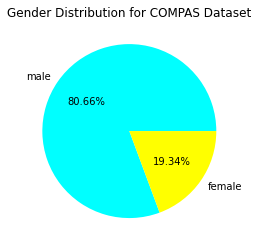

In [26]:
# Setting colors for all pie charts
colors = ['cyan','yellow']

# Visualizing population distribution by gender
labels = ['male', 'female']
plt.pie(compas_two_years['sex'].value_counts(), labels = labels, colors= colors, autopct='%1.2f%%')
plt.title('Gender Distribution for COMPAS Dataset')
plt.show()

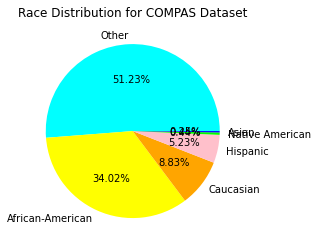

In [27]:
# Setting colors for all pie charts
colors = ['cyan','yellow','orange', 'pink', 'lime', 'blue']

# Visualizing population distribution by gender
labels = ['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian']
plt.pie(compas_two_years['race'].value_counts(), labels = labels, colors= colors, autopct='%1.2f%%')
plt.title('Race Distribution for COMPAS Dataset')
plt.show()

We can observe that the distribution of races in the COMPAS dataset is pretty imbalanced. The ambiguous 'other' category outweighs all other races by a huge margin. The dataset massively underrepresents Asian, Native-American, Hispanic and Caucasian races. It is also hugely skewed to represent males by 80% and females with only 20%.

Percentage of convicts of different races that did/did not recidivate.

In [28]:
# Function to calculate percentage of an attribute's instances
def percentage_stacked_bar(attribute, values, dataset):
  if(dataset == 'rec'):
    total_instances_positive = []
    total_instances_negative = []
    for value in values:
      total_instances = len(compas_two_years[compas_two_years[attribute]==value])
      positives = len(compas_two_years[(compas_two_years[attribute]==value) & (compas_two_years['is_recid']==1)])
      negatives = len(compas_two_years[(compas_two_years[attribute]==value) & (compas_two_years['is_recid']==0)])
      if(total_instances != 0):
        total_instances_positive.append(100*positives/total_instances)
        total_instances_negative.append(100*negatives/total_instances)
    return (total_instances_positive, total_instances_negative)

  else:
    total_instances_positive = []
    total_instances_negative = []
    for value in values:
      total_instances = len(final_aggression_data[final_aggression_data[attribute]==value])
      positives = len(final_aggression_data[(final_aggression_data[attribute]==value) & (final_aggression_data['aggression']==1)])
      negatives = len(final_aggression_data[(final_aggression_data[attribute]==value) & (final_aggression_data['aggression']==0)])
      if(total_instances != 0):
        total_instances_positive.append(100*positives/total_instances)
        total_instances_negative.append(100*negatives/total_instances)
    return (total_instances_positive, total_instances_negative)

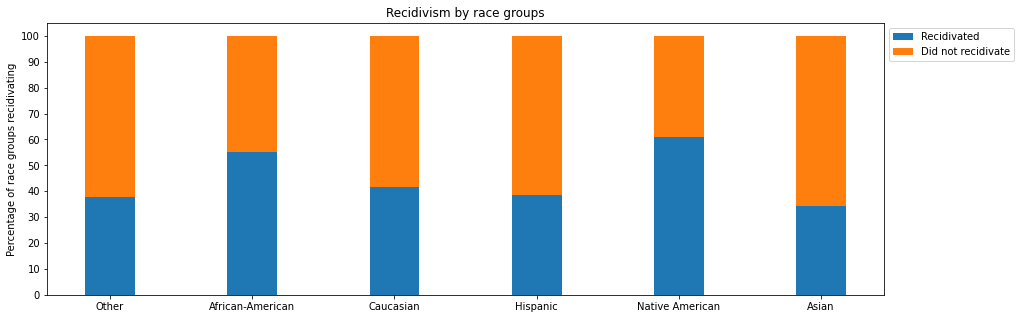

In [29]:
# Calculating the percentages of people with different races likely to recidivate
race_groups = ['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian']
race_percent = percentage_stacked_bar('race',race_groups,'rec')

# Plotting stacked bar graph
N = 6             # number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(15,5))
p1 = plt.bar(ind, race_percent[0], width)
p2 = plt.bar(ind, race_percent[1], width, bottom=race_percent[0])

# Add formats: labels, ticks
plt.ylabel('Percentage of race groups recidivating')
plt.title('Recidivism by race groups')
plt.xticks(ind, race_groups)
plt.yticks(np.arange(0, 105, 10))
plt.legend((p1[0], p2[0]), ('Recidivated', 'Did not recidivate'),loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()

Plotting a histogram of predicted decile scores for all races.

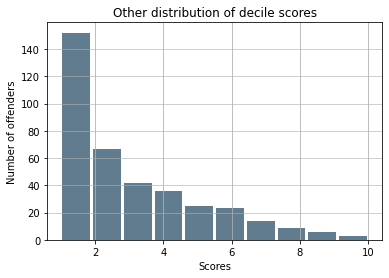

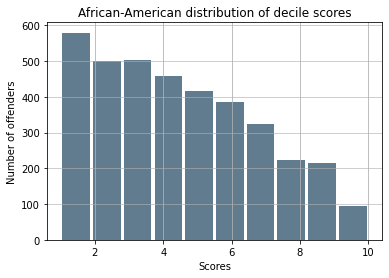

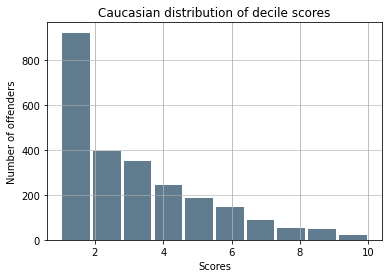

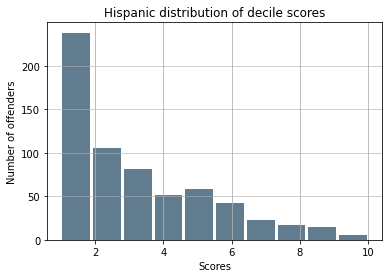

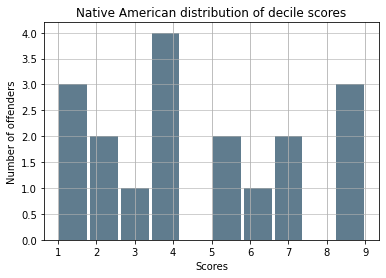

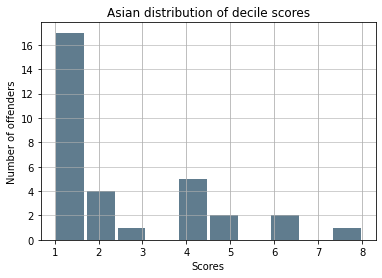

In [30]:
for i in range(len(race_groups)):
  current_race = race_groups[i]
  x = pd.Series(compas_two_years[compas_two_years['race']==current_race]['v_decile_score'])
  x.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
  plt.title(f'{current_race} distribution of decile scores')
  plt.xlabel('Scores')
  plt.ylabel('Number of offenders')
  plt.grid(axis='y', alpha=0.75)
  plt.show()


We can see above the distribution of offenders by race and the decile score they received. As we see, the decile score amongst Native Americans and African Americans is on the higher end with higher averages. 